In [1]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import geopandas as gpd

In [5]:
df = gpd.read_file('/Users/natalia/Downloads/RUS_adm/RUS_adm1.shp')

In [6]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [7]:
df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,188,RUS,Russia,1,Adygey,Respublika,Republic,Республика Адыгея,Adygea|Adygeya|Adygheya|Republic of Adygeya|Ad...,"POLYGON ((39.64794921874994 45.16419601440435,..."
1,188,RUS,Russia,2,Altay,Kray,Territory,Алтайский край,Altayskiy Kray,"POLYGON ((85.36115264892589 54.22598266601574,..."
2,188,RUS,Russia,3,Amur,Oblast,Region,Амурская область,Amurskaya Oblast,"POLYGON ((120.6742858886719 57.05606842041027,..."
3,188,RUS,Russia,4,Arkhangel'sk,Oblast,Region,Архангельская область,Arcangelo|Archangel|Archangelsk|Arkhangelskaya...,(POLYGON ((36.77239608764648 63.91510391235352...
4,188,RUS,Russia,5,Astrakhan',Oblast,Region,Астраханская область,Astrachan|Astrakhanskaya Oblast,"POLYGON ((46.58406066894548 48.61551284790045,..."


In [6]:
df['point'] = (df['geometry'].centroid)

In [10]:
df2000ex = pd.read_excel('/Users/natalia/Downloads/2000.xlsx')
df2000ex.head()

,Unnamed: 0,ID_1,SUBJECT,TFR,THE RATIO OF MARRIAGES AND DIVORCES,MALE TO FEMALE RATIO,DISEASE RATE,MIGRATION GROWTH RATE,AVERAGE PER CAPITA INCOME,"THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION",THE LEVEL OF ECONOMY ACTIVITY,DUMMY INNOVATIONS,X,Y,coord
0,Центральный федеральный округ,7,Белгородская область,-0.353433,0.388189,0.599781,-0.098970,1.637172,-0.379941,-0.221110,-0.038539,0,37.545306,50.671021,37.54530555076229 50.67102136016434
1,Центральный федеральный округ,8,Брянская область,-0.353433,0.380311,0.776997,-0.413693,0.105430,-0.605728,-0.074316,-1.330839,0,33.406285,52.910301,33.40628480981726 52.91030130187259
2,Центральный федеральный округ,76,Владимирская область,-0.544834,-0.494241,1.111736,0.763633,0.213872,-0.635462,-0.325560,-0.116860,0,40.691957,55.994787,40.69195679992686 55.99478691751805
3,Центральный федеральный округ,79,Воронежская область,-0.353433,-0.021510,0.757306,-2.156202,0.498532,-0.443124,-0.270512,-1.017554,1,40.309955,50.959752,40.30995529588178 50.9597523826156
4,Центральный федеральный округ,19,Ивановская область,-1.055236,-0.446968,1.525239,0.447263,0.213872,-0.860320,0.056952,-0.704269,0,41.726645,56.999219,41.72664453665994 56.99921915590824


In [11]:
df2000 = gp.geodataframe.GeoDataFrame(pd.merge(df2000ex, df, on='ID_1'))

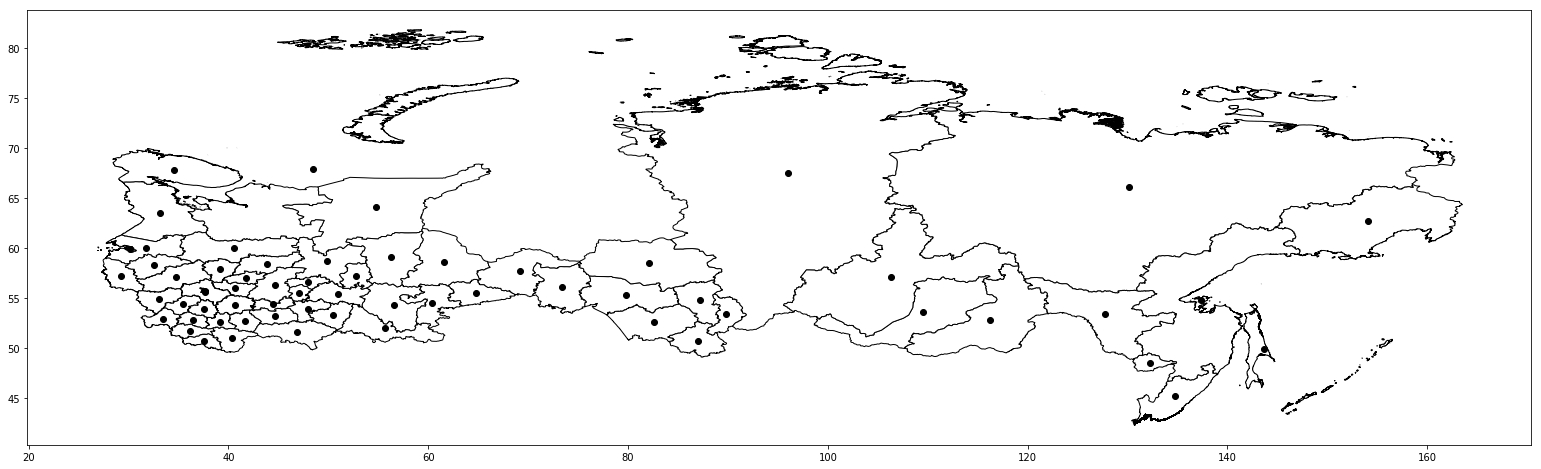

In [16]:
fig, ax = plt.subplots(figsize = (32, 8))
df2000.plot(ax=ax, edgecolor='black', facecolor='white')
df2000.centroid.plot(ax = ax, c = 'black')
plt.savefig('all_regions_blac_n_white.png')
plt.show()

In [17]:
Y2000 = np.array(df2000['TFR']).reshape((-1,1))

In [18]:
X2000 = df2000[['THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO', 'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME', 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION','THE LEVEL OF ECONOMY ACTIVITY']].values

In [19]:
coords = list(zip(df2000['X'], df2000['Y']))

In [20]:
from sklearn.linear_model import LinearRegression as zhopa

In [21]:
# reg = zhopa().fit(X, Y)

In [22]:
from spglm.glm import GLM
from spglm.family import Gaussian

In [23]:
gwr_selector = Sel_BW(coords, Y2000, X2000)

In [24]:
gwr_bw = gwr_selector.search()
print(gwr_bw)

62.0


In [25]:
model2000 = GWR(coords, Y2000, X2000, gwr_bw, fixed=False, kernel='bisquare')

In [26]:
gwr_results2000 = model2000.fit()
gwr_results2000.summary()

Model type                                                         Gaussian
Number of observations:                                                  63
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             24.351
Log-likelihood:                                                     -59.450
AIC:                                                                134.900
AICc:                                                               140.297
BIC:                                                               -203.522
R2:                                                                   0.607
Adj. R2:                                                              0.557

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [29]:
x1 = df2000['THE RATIO OF MARRIAGES AND DIVORCES']

In [33]:
# model1 = GLM(Y2000, x1, family=Gaussian())
# results = model1.fit()
# results.params

In [34]:
df2000['R2'] = gwr_results.localR2
fig, ax = plt.subplots(figsize = (32, 8))
df2000.plot('R2', ax=ax, legend=True)
plt.savefig('model1_R2.png')
plt.show()

NameError: name 'gwr_results' is not defined

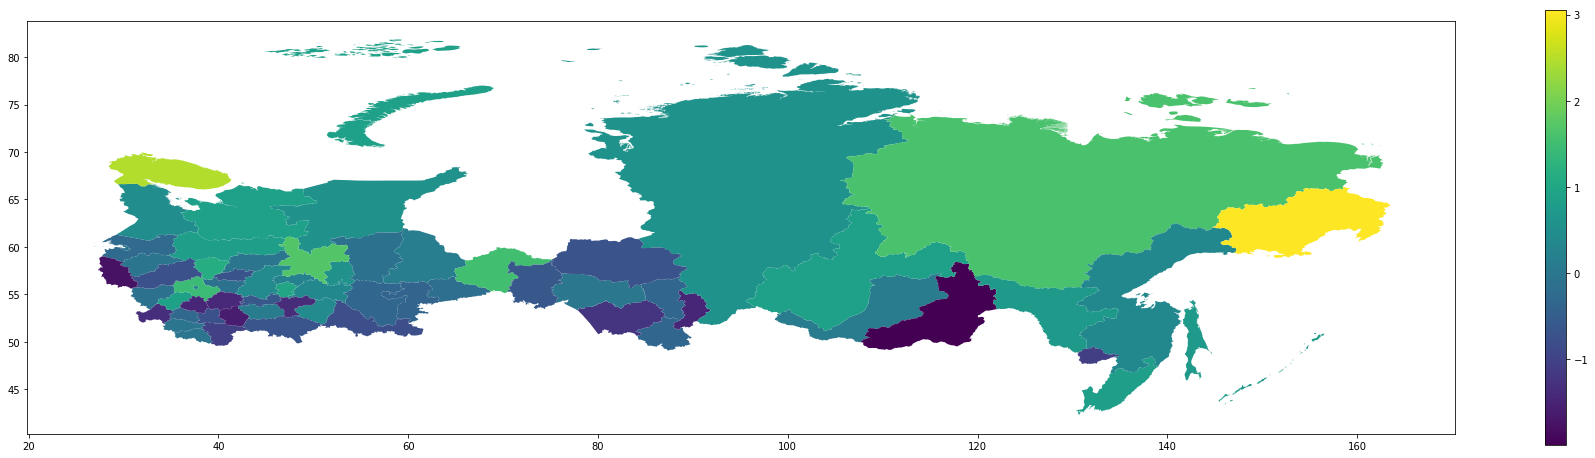

In [25]:
fig, ax = plt.subplots(figsize = (32, 8))
df2000.plot('THE LEVEL OF ECONOMY ACTIVITY', ax=ax, legend=True)
plt.savefig('m_1_THE LEVEL OF ECONOMY ACTIVITY.png')
plt.show()

In [ ]:
2017 год

In [67]:
df2017ex = pd.read_excel('/Users/natalia/Desktop/2017.xlsx')
df2017ex.head()

,Unnamed: 0,ID_1,num,SUBJECT,TFR,THE RATIO OF MARRIAGES AND DIVORCES,MALE TO FEMALE RATIO,DISEASE RATE,MIGRATION GROWTH RATE,AVERAGE PER CAPITA INCOME,"THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION",THE LEVEL OF ECONOMY ACTIVITY,DUMMY INNOVATIONS,X,Y
0,Сибирский федеральный округ,2,2,Алтайский край,0.118256,1.494853,0.219302,1.944434,-0.489723,-0.722731,-0.439045,-1.532125,-0.723938,82.599770,52.609181
1,Дальневосточный федеральный округ,3,3,Амурская область,0.454389,0.540190,-3.300699,0.216019,-0.323927,0.285052,-0.683526,-0.120676,1.349158,127.711639,53.418482
2,Северо-Западный федеральный округ,4,4,Архангельская область,0.298864,-0.043215,-0.462698,1.396946,-1.215081,0.581291,1.239947,-0.537695,-0.723938,48.437704,67.865679
3,Центральный федеральный округ,7,7,Белгородская область,-1.156039,-0.326078,0.285302,-0.883291,0.587951,0.215202,1.965575,0.520892,-0.723938,37.545306,50.671021
4,Центральный федеральный округ,8,8,Брянская область,-0.930278,0.434116,0.725302,-0.341581,-0.199580,-0.220262,-0.602032,-0.666009,-0.723938,33.406285,52.910301


In [68]:
df2017 = gp.geodataframe.GeoDataFrame(pd.merge(df2017ex, df, on='ID_1'))

In [144]:
X2017 = df2017[['THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO', 'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME', 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION','THE LEVEL OF ECONOMY ACTIVITY']].values

In [145]:
coords = list(zip(df2017['X'], df2017['Y']))

In [146]:
gwr_selector = Sel_BW(coords, Y2017, X2017)

In [148]:
gwr_bw2017 = gwr_selector.search()
print(gwr_bw)

60.0


In [149]:
model2017 = GWR(coords, Y2017, X2017, gwr_bw2017, fixed=False, kernel='bisquare')

In [150]:
gwr_results2017 = model2017.fit()
print(gwr_results2017.summary())

Model type                                                         Gaussian
Number of observations:                                                  63
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             32.125
Log-likelihood:                                                     -68.178
AIC:                                                                152.356
AICc:                                                               157.752
BIC:                                                               -195.747
R2:                                                                   0.485
Adj. R2:                                                              0.419

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
fig, ax = plt.subplots(figsize = (32, 8))
df2017.plot('THE LEVEL OF ECONOMY ACTIVITY', ax=ax, legend=True)
#plt.savefig('m_1_THE LEVEL OF ECONOMY ACTIVITY.png')
plt.show()

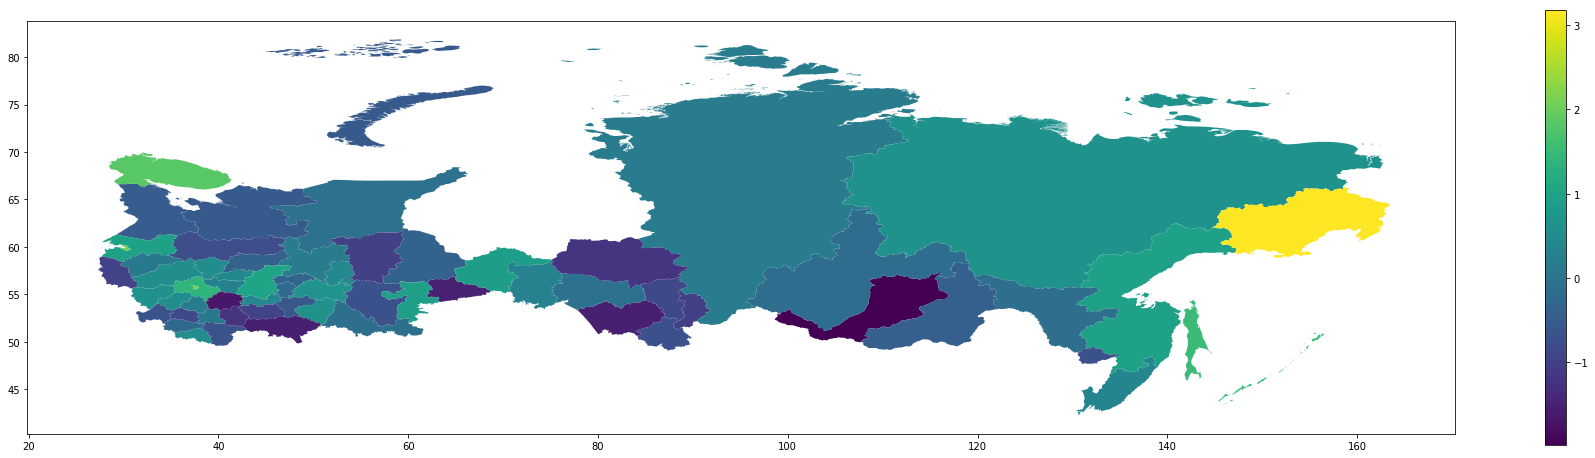

In [80]:
fig, ax = plt.subplots(figsize = (32, 8))
df2017.plot('THE LEVEL OF ECONOMY ACTIVITY', ax=ax, legend=True)
#plt.savefig('m_1_THE LEVEL OF ECONOMY ACTIVITY.png')
plt.show()

In [43]:
list(df2000)

['Unnamed: 0',
 'ID_1',
 'SUBJECT',
 'TFR',
 'THE RATIO OF MARRIAGES AND DIVORCES',
 'MALE TO FEMALE RATIO',
 'DISEASE RATE',
 'MIGRATION GROWTH RATE',
 'AVERAGE PER CAPITA INCOME',
 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION',
 'THE LEVEL OF ECONOMY ACTIVITY',
 'DUMMY INNOVATIONS',
 'X',
 'Y',
 'coord',
 'ID_0',
 'ISO',
 'NAME_0',
 'NAME_1',
 'TYPE_1',
 'ENGTYPE_1',
 'NL_NAME_1',
 'VARNAME_1',
 'geometry',
 'point',
 'R2']

In [110]:
t = gwr_results.tvalues

In [120]:
df2017['tval THE RATIO OF MARRIAGES AND DIVORCES'] = t.T[1]

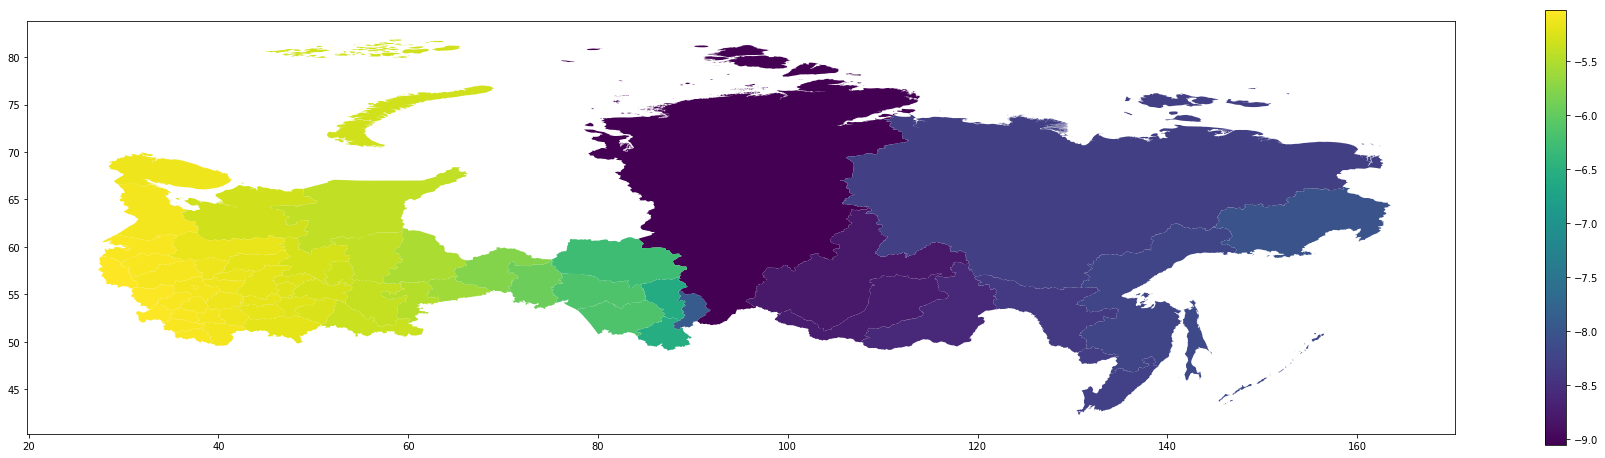

In [121]:
fig, ax = plt.subplots(figsize = (32, 8))
df2017.plot('tval THE RATIO OF MARRIAGES AND DIVORCES', ax=ax, legend=True)
#plt.savefig('m_1_THE LEVEL OF ECONOMY ACTIVITY.png')
plt.show()

In [ ]:
2000inn

In [8]:
df2000inn_ex = pd.read_excel('/Users/natalia/Desktop/2000inn.xlsx')
df2000inn_ex.head()

,ID_1,SUBJECT,TFR,THE RATIO OF MARRIAGES AND DIVORCES,MALE TO FEMALE RATIO,DISEASE RATE,MIGRATION GROWTH RATE,AVERAGE PER CAPITA INCOME,"THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION",THE LEVEL OF ECONOMY ACTIVITY,X,Y
0,3,Амурская область,0.205711,-0.585241,-0.856548,-1.299016,-0.545207,-0.488051,-0.265864,0.313758,127.711639,53.418482
1,6,Республика Башкортостан,0.788218,-0.558112,0.274428,0.497192,0.401503,-0.545044,-0.062391,-0.619938,56.528301,54.282013
2,9,Республика Бурятия,1.057067,-1.078983,-0.440748,-1.844305,-0.310701,-0.607160,-0.404905,-0.253129,109.506488,53.566006
3,14,г. Санкт-Петербург,-1.407386,0.429374,1.787940,-0.550755,0.566526,-0.019939,0.091910,-0.386514,30.182474,59.902176
4,16,Республика Алтай,2.580548,-1.442508,-0.241164,-0.070366,0.384132,-0.899811,0.105475,-0.619938,87.014699,50.735920


In [9]:
df2000inn = gp.geodataframe.GeoDataFrame(pd.merge(df2000inn_ex, df, on='ID_1'))

In [10]:
Y2000inn = np.array(df2000inn['TFR']).reshape((-1,1))
X2000inn = df2000inn[['THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO', 'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME', 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION','THE LEVEL OF ECONOMY ACTIVITY']].values
coords2000inn = list(zip(df2000inn['X'], df2000inn['Y']))

In [11]:
gwr_selector2000inn = Sel_BW(coords2000inn, Y2000inn, X2000inn)

In [12]:
gwr_bw2000inn = gwr_selector2000inn.search(search_method = 'interval', interval = 2,bw_min = 101,bw_max = 150)

In [13]:
print(gwr_bw2000inn)

150


In [14]:
model2000inn = GWR(coords2000inn, Y2000inn, X2000inn, gwr_bw2000inn, fixed=False, kernel='bisquare')
gwr_results2000inn = model2000inn.fit()
print(gwr_results2000inn.summary())

Model type                                                         Gaussian
Number of observations:                                                  22
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              7.639
Log-likelihood:                                                     -19.581
AIC:                                                                 55.161
AICc:                                                                72.161
BIC:                                                                -35.636
R2:                                                                   0.636
Adj. R2:                                                              0.454

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [15]:
t = gwr_results2000inn.tvalues

In [35]:
a = gwr_results2000inn.params

In [19]:
list(df2000inn)

['ID_1',
 'SUBJECT',
 'TFR',
 'THE RATIO OF MARRIAGES AND DIVORCES',
 'MALE TO FEMALE RATIO',
 'DISEASE RATE',
 'MIGRATION GROWTH RATE',
 'AVERAGE PER CAPITA INCOME',
 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION',
 'THE LEVEL OF ECONOMY ACTIVITY',
 'X',
 'Y',
 'ID_0',
 'ISO',
 'NAME_0',
 'NAME_1',
 'TYPE_1',
 'ENGTYPE_1',
 'NL_NAME_1',
 'VARNAME_1',
 'geometry',
 'tval THE RATIO OF MARRIAGES AND DIVORCES']

In [48]:
df2000inn['est THE LEVEL OF ECONOMY ACTIVITY'] = a.T[7]

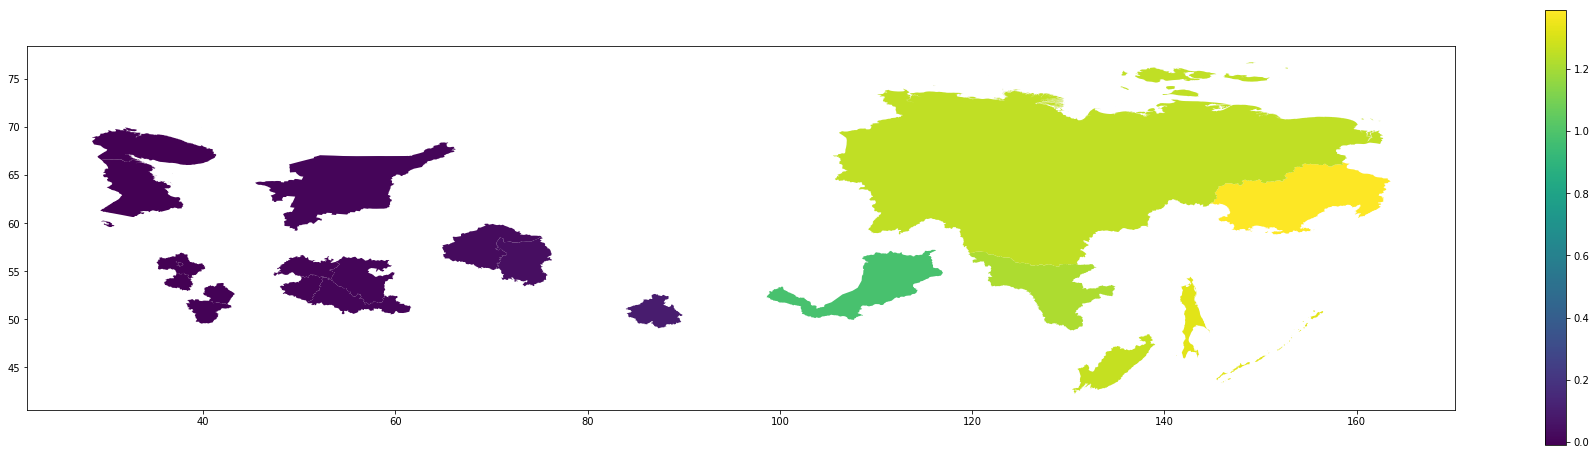

In [49]:
fig, ax = plt.subplots(figsize = (32, 8))
df2000inn.plot('est THE LEVEL OF ECONOMY ACTIVITY', ax=ax, legend=True)
#plt.savefig('m_1_THE LEVEL OF ECONOMY ACTIVITY.png')
plt.show()

In [237]:
2000noinn

SyntaxError: invalid syntax (<ipython-input-237-c3f36d67b452>, line 1)

In [50]:
df2000noinn_ex = pd.read_excel('/Users/natalia/Desktop/2000noinn.xlsx')


In [51]:
df2000noinn = gp.geodataframe.GeoDataFrame(pd.merge(df2000noinn_ex, df, on='ID_1'))
df2000noinn.shape

(41, 22)

In [53]:
Y2000noinn = np.array(df2000noinn['TFR']).reshape((-1,1))
X2000noinn = df2000noinn[['THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO', 'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME', 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION','THE LEVEL OF ECONOMY ACTIVITY']].values
coords2000noinn = list(zip(df2000noinn['X'], df2000noinn['Y']))

In [54]:
gwr_selector2000noinn = Sel_BW(coords2000noinn, Y2000noinn, X2000noinn)

In [55]:
gwr_bw2000noinn = gwr_selector2000noinn.search()
print(gwr_bw2000noinn)

64.0


In [243]:
model2000noinn = GWR(coords2000noinn, Y2000noinn, X2000noinn, gwr_bw2000noinn, fixed=False, kernel='bisquare')
gwr_results2000noinn = model2000noinn.fit()
print(gwr_results2000noinn.summary())

Model type                                                         Gaussian
Number of observations:                                                  41
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             13.524
Log-likelihood:                                                     -35.439
AIC:                                                                 86.878
AICc:                                                                94.685
BIC:                                                               -109.024
R2:                                                                   0.662
Adj. R2:                                                              0.590

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [56]:
df2017inn_ex = pd.read_excel('/Users/natalia/Desktop/2017inn.xlsx')

In [57]:
df2017inn = gp.geodataframe.GeoDataFrame(pd.merge(df2017inn_ex, df, on='ID_1'))
df2017inn.shape

(22, 22)

In [58]:
Y2017inn = np.array(df2017inn['TFR']).reshape((-1,1))
X2017inn = df2017inn[['THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO', 'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME', 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION','THE LEVEL OF ECONOMY ACTIVITY']].values
coords2017inn = list(zip(df2017inn['X'], df2017inn['Y']))

In [59]:
gwr_selector2017inn = Sel_BW(coords2017inn, Y2017inn, X2017inn)

In [60]:
gwr_bw2017inn = gwr_selector2017inn.search(search_method = 'interval', interval = 2,bw_min = 101,bw_max = 150)

In [61]:
model2017inn = GWR(coords2017inn, Y2017inn, X2017inn, gwr_bw2017inn, fixed=False, kernel='bisquare')
gwr_results2017inn = model2017inn.fit()
print(gwr_results2017inn.summary())

Model type                                                         Gaussian
Number of observations:                                                  22
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              9.157
Log-likelihood:                                                     -21.575
AIC:                                                                 59.150
AICc:                                                                76.150
BIC:                                                                -34.117
R2:                                                                   0.564
Adj. R2:                                                              0.346

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [67]:
list(df2017inn)

['Unnamed: 0',
 'ID_1',
 'SUBJECT',
 'TFR',
 'THE RATIO OF MARRIAGES AND DIVORCES',
 'MALE TO FEMALE RATIO',
 'DISEASE RATE',
 'MIGRATION GROWTH RATE',
 'AVERAGE PER CAPITA INCOME',
 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION',
 'THE LEVEL OF ECONOMY ACTIVITY',
 'X',
 'Y',
 'ID_0',
 'ISO',
 'NAME_0',
 'NAME_1',
 'TYPE_1',
 'ENGTYPE_1',
 'NL_NAME_1',
 'VARNAME_1',
 'geometry',
 'tval THE RATIO OF MARRIAGES AND DIVORCES']

In [63]:
t = gwr_results2017inn.tvalues

In [80]:
a = gwr_results2017inn.params

In [93]:
df2017inn['est THE LEVEL OF ECONOMY ACTIVITY'] = a.T[7]

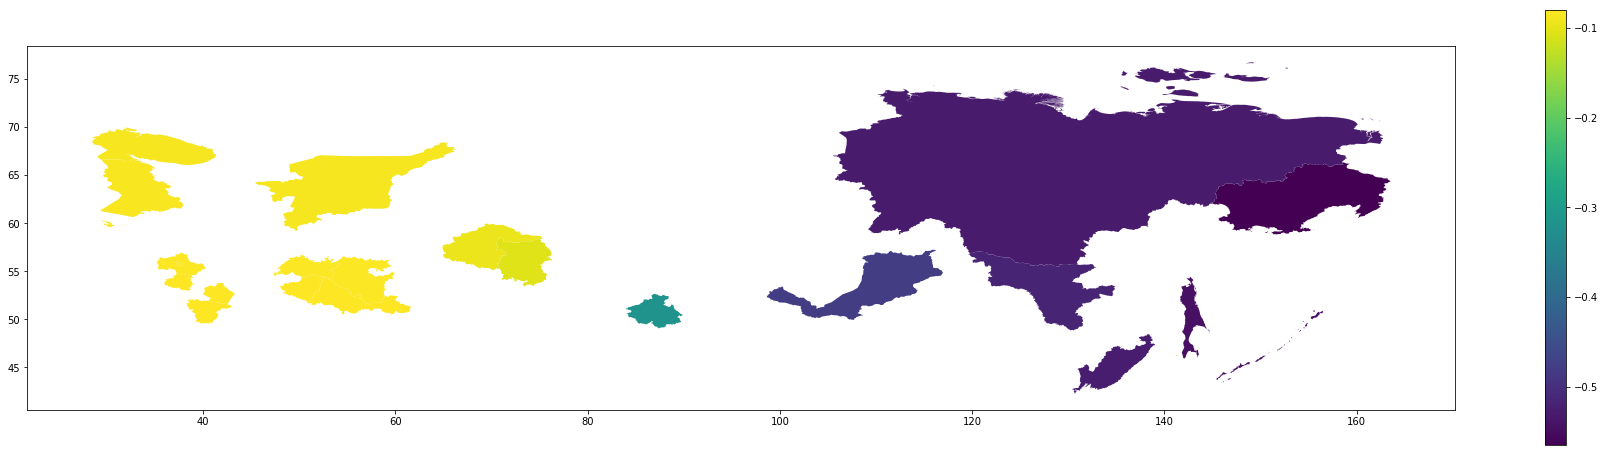

In [94]:
fig, ax = plt.subplots(figsize = (32, 8))
df2017inn.plot('est THE LEVEL OF ECONOMY ACTIVITY', ax=ax, legend=True)
#plt.savefig('m_1_THE LEVEL OF ECONOMY ACTIVITY.png')
plt.show()

In [282]:
df2017noinn_ex = pd.read_excel('/Users/natalia/Desktop/2017noinn.xlsx')

In [283]:
df2017noinn = gp.geodataframe.GeoDataFrame(pd.merge(df2017noinn_ex, df, on='ID_1'))
df2017noinn.shape

(41, 23)

In [284]:
Y2017noinn = np.array(df2017noinn['TFR']).reshape((-1,1))
X2017noinn = df2017noinn[['THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO', 'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME', 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION','THE LEVEL OF ECONOMY ACTIVITY']].values
coords2017noinn = list(zip(df2017noinn['X'], df2017noinn['Y']))

In [285]:
gwr_selector2017noinn = Sel_BW(coords2017noinn, Y2017noinn, X2017noinn)

In [288]:
gwr_bw2017noinn = gwr_selector2017inn.search(search_method = 'interval', interval = 2,bw_min = 101,bw_max = 150)

In [289]:
model2017noinn = GWR(coords2017noinn, Y2017noinn, X2017noinn, gwr_bw2017noinn, fixed=False, kernel='bisquare')
gwr_results2017noinn = model2017noinn.fit()
print(gwr_results2017noinn.summary())

Model type                                                         Gaussian
Number of observations:                                                  41
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             18.977
Log-likelihood:                                                     -42.384
AIC:                                                                100.769
AICc:                                                               108.575
BIC:                                                               -103.571
R2:                                                                   0.526
Adj. R2:                                                              0.425

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [45]:
df2000_copy = df2000.copy()
print(df2000_copy.columns)
del df2000_copy['point']
print(df2000_copy.columns)
print(df2000.columns)
df2000_copy.to_file('df2000.gbd')

Index(['Unnamed: 0', 'ID_1', 'SUBJECT', 'TFR',
       'THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO',
       'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME',
       'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION',
       'THE LEVEL OF ECONOMY ACTIVITY', 'DUMMY INNOVATIONS', 'X', 'Y', 'coord',
       'ID_0', 'ISO', 'NAME_0', 'NAME_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1',
       'VARNAME_1', 'geometry', 'point', 'number'],
      dtype='object')
Index(['Unnamed: 0', 'ID_1', 'SUBJECT', 'TFR',
       'THE RATIO OF MARRIAGES AND DIVORCES', 'MALE TO FEMALE RATIO',
       'DISEASE RATE', 'MIGRATION GROWTH RATE', 'AVERAGE PER CAPITA INCOME',
       'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION',
       'THE LEVEL OF ECONOMY ACTIVITY', 'DUMMY INNOVATIONS', 'X', 'Y', 'coord',
       'ID_0', 'ISO', 'NAME_0', 'NAME_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1',
       'VARNAME_1', 'geometry', 'number'],
      dtype='object')
Index(['Unnamed: 0', 'ID_1', 

In [46]:
df2000_copy.head()

,Unnamed: 0,ID_1,SUBJECT,TFR,THE RATIO OF MARRIAGES AND DIVORCES,MALE TO FEMALE RATIO,DISEASE RATE,MIGRATION GROWTH RATE,AVERAGE PER CAPITA INCOME,"THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION",...,ID_0,ISO,NAME_0,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,number
0,Центральный федеральный округ,7,Белгородская область,-0.353433,0.388189,0.599781,-0.098970,1.637172,-0.379941,-0.221110,...,188,RUS,Russia,Belgorod,Oblast,Region,Белгородская область,Belgorodskaya Oblast,"POLYGON ((38.10826492309587 51.38651275634777,...",1
1,Центральный федеральный округ,8,Брянская область,-0.353433,0.380311,0.776997,-0.413693,0.105430,-0.605728,-0.074316,...,188,RUS,Russia,Bryansk,Oblast,Region,Брянская область,Bryanskaya Oblast,"POLYGON ((33.83618927001959 53.97200775146484,...",2
2,Центральный федеральный округ,76,Владимирская область,-0.544834,-0.494241,1.111736,0.763633,0.213872,-0.635462,-0.325560,...,188,RUS,Russia,Vladimir,Oblast,Region,Владимирская область,Vladimirskaya Oblast,"POLYGON ((39.88538360595732 56.7650032043457, ...",3
3,Центральный федеральный округ,79,Воронежская область,-0.353433,-0.021510,0.757306,-2.156202,0.498532,-0.443124,-0.270512,...,188,RUS,Russia,Voronezh,Oblast,Region,Воронежская область,Voronezhskaya Oblast,"POLYGON ((38.77813339233415 52.08555221557623,...",4
4,Центральный федеральный округ,19,Ивановская область,-1.055236,-0.446968,1.525239,0.447263,0.213872,-0.860320,0.056952,...,188,RUS,Russia,Ivanovo,Oblast,Region,Ивановская область,Ivanovskaya Oblast,"POLYGON ((41.61824035644526 57.71242523193371,...",5


In [299]:
list(df2000)

['Unnamed: 0',
 'ID_1',
 'SUBJECT',
 'TFR',
 'THE RATIO OF MARRIAGES AND DIVORCES',
 'MALE TO FEMALE RATIO',
 'DISEASE RATE',
 'MIGRATION GROWTH RATE',
 'AVERAGE PER CAPITA INCOME',
 'THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION',
 'THE LEVEL OF ECONOMY ACTIVITY',
 'DUMMY INNOVATIONS',
 'X',
 'Y',
 'coord',
 'ID_0',
 'ISO',
 'NAME_0',
 'NAME_1',
 'TYPE_1',
 'ENGTYPE_1',
 'NL_NAME_1',
 'VARNAME_1',
 'geometry',
 'point']

In [311]:
shp = gpd.GeoDataFrame()

In [312]:
shp['id'] = df2000['ID_1']

In [313]:
shp['geometry'] = df2000['geometry']

In [314]:
shp.to_file('shp.shp')

In [33]:
W_matrix_2000gwr_results2000.W

array([[1.00000000e+00, 9.96067951e-01, 9.93214571e-01, ...,
        0.00000000e+00, 3.99999881e-14, 4.11148174e-02],
       [9.96359931e-01, 1.00000000e+00, 9.89728515e-01, ...,
        0.00000000e+00, 3.99999880e-14, 3.79966928e-02],
       [9.92818588e-01, 9.88259427e-01, 1.00000000e+00, ...,
        0.00000000e+00, 3.99999880e-14, 4.26264650e-02],
       ...,
       [1.13168267e-02, 2.08087809e-03, 2.56016247e-02, ...,
        1.00000000e+00, 9.64956058e-01, 9.13816509e-01],
       [1.74891338e-02, 3.91535861e-03, 3.24633759e-02, ...,
        9.58595162e-01, 1.00000000e+00, 9.79800851e-01],
       [2.22671530e-02, 5.16561927e-03, 3.99751770e-02, ...,
        8.75854819e-01, 9.75188173e-01, 1.00000000e+00]])

In [37]:
df2000['number'] = df2000.index + 1

In [38]:
df2000.head()

,Unnamed: 0,ID_1,SUBJECT,TFR,THE RATIO OF MARRIAGES AND DIVORCES,MALE TO FEMALE RATIO,DISEASE RATE,MIGRATION GROWTH RATE,AVERAGE PER CAPITA INCOME,"THE PUBLICATION OF NEWSPAPERS PER 1,000 OF POPULATION",...,ISO,NAME_0,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,point,number
0,Центральный федеральный округ,7,Белгородская область,-0.353433,0.388189,0.599781,-0.098970,1.637172,-0.379941,-0.221110,...,RUS,Russia,Belgorod,Oblast,Region,Белгородская область,Belgorodskaya Oblast,"POLYGON ((38.10826492309587 51.38651275634777,...",POINT (37.54530555076229 50.67102136016434),1
1,Центральный федеральный округ,8,Брянская область,-0.353433,0.380311,0.776997,-0.413693,0.105430,-0.605728,-0.074316,...,RUS,Russia,Bryansk,Oblast,Region,Брянская область,Bryanskaya Oblast,"POLYGON ((33.83618927001959 53.97200775146484,...",POINT (33.40628480981726 52.91030130187259),2
2,Центральный федеральный округ,76,Владимирская область,-0.544834,-0.494241,1.111736,0.763633,0.213872,-0.635462,-0.325560,...,RUS,Russia,Vladimir,Oblast,Region,Владимирская область,Vladimirskaya Oblast,"POLYGON ((39.88538360595732 56.7650032043457, ...",POINT (40.69195679992686 55.99478691751805),3
3,Центральный федеральный округ,79,Воронежская область,-0.353433,-0.021510,0.757306,-2.156202,0.498532,-0.443124,-0.270512,...,RUS,Russia,Voronezh,Oblast,Region,Воронежская область,Voronezhskaya Oblast,"POLYGON ((38.77813339233415 52.08555221557623,...",POINT (40.30995529588178 50.9597523826156),4
4,Центральный федеральный округ,19,Ивановская область,-1.055236,-0.446968,1.525239,0.447263,0.213872,-0.860320,0.056952,...,RUS,Russia,Ivanovo,Oblast,Region,Ивановская область,Ivanovskaya Oblast,"POLYGON ((41.61824035644526 57.71242523193371,...",POINT (41.72664453665994 56.99921915590824),5


In [102]:
df2000pd = pd.DataFrame(df2000)
df2017pd = pd.DataFrame(df2017)

In [141]:
excel_data_file = 'Downloads/данные для диплома v.1.xlsx'

In [152]:
sheets = [
    'Суммарный коэффициент рождаемос',
    'Соотношение браков и разводов',
    'Соотношение мужчин и женщин не',
    'Заболеваемость на 1000 человек',
    'К-т миграционного прироста',
    'Среднедушевые доходы населения',
    'Выпуск газет на 1000 чел',
    'уровень экономической активност'
    
    # to be continued
]
useful_regions = dict(zip(df2000['SUBJECT'], df2000['number']))
years = list(range(2000, 2018))
# years = list(range(2000, 2003))


data = pd.read_excel(excel_data_file, header=1, sheet_name=sheets)

def normalize_data(df):
#     print(df.columns)
    regions = list(df['Unnamed: 0'])
    df = df[years]
    df['SUBJECT'] = regions
    df = df[df['SUBJECT'].isin(useful_regions)]
    df = df.merge(df2000[['SUBJECT', 'number']], on='SUBJECT')
    return df

for shit in sheets:
    print('normalizing shit "{}"'.format(shit))
    data[shit] = normalize_data(data[shit])

normalizing shit "Суммарный коэффициент рождаемос"
normalizing shit "Соотношение браков и разводов"


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


normalizing shit "Соотношение мужчин и женщин не"
normalizing shit "Заболеваемость на 1000 человек"
normalizing shit "К-т миграционного прироста"
normalizing shit "Среднедушевые доходы населения"
normalizing shit "Выпуск газет на 1000 чел"
normalizing shit "уровень экономической активност"


In [153]:
data[sheets[1]].head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,SUBJECT,number
0,760,763,829,665,658,503,479,440,537,524,510,466,558,573,580,527,713,601,Белгородская область,1
1,759,871,920,781,700,575,624,553,670,668,612,558,665,588,696,604,763,644,Брянская область,2
2,648,703,781,679,638,570,591,553,613,596,541,527,564,608,589,547,626,631,Владимирская область,3
3,708,842,976,798,764,629,590,579,701,694,594,554,611,621,600,532,663,557,Воронежская область,4
4,654,774,801,769,694,646,586,527,625,641,567,569,557,585,608,558,644,613,Ивановская область,5


In [154]:
tables = dict()
for year in years:
    table = None
    for shit in sheets:
        rhs = data[shit][['number', year]]
        if table is None:
            table = rhs
        else:
            table = table.merge(rhs, on='number')
        table = table.rename(columns={year: shit})
    
    table['year'] = year
    tables[year] = table

In [155]:
tables[2000].head()

,number,Суммарный коэффициент рождаемос,Соотношение браков и разводов,Соотношение мужчин и женщин не,Заболеваемость на 1000 человек,К-т миграционного прироста,Среднедушевые доходы населения,Выпуск газет на 1000 чел,уровень экономической активност,year
0,1,1.15,760,1171,753.7,109.0,1555,289,65.7,2000
1,2,1.15,759,1180,715.5,-4.0,1312,393,62.4,2000
2,3,1.12,648,1197,858.4,4.0,1280,215,65.5,2000
3,4,1.15,708,1179,504.0,25.0,1487,254,63.2,2000
4,5,1.04,654,1218,820.0,4.0,1038,486,64.0,2000


In [156]:
result = pd.concat(tables.values()).sort_values(by=["number", "year"])

In [157]:
result.head()

,number,Суммарный коэффициент рождаемос,Соотношение браков и разводов,Соотношение мужчин и женщин не,Заболеваемость на 1000 человек,К-т миграционного прироста,Среднедушевые доходы населения,Выпуск газет на 1000 чел,уровень экономической активност,year
0,1,1.15,760,1171,753.7,109.0,1555,289,65.7,2000
0,1,1.15,763,1176,793.9,87.0,2121,253,65.7,2001
0,1,1.20,829,1180,783.0,101.0,2762,277,62.7,2002
0,1,1.24,665,1181,822.2,77.0,3357,572,62.0,2003
0,1,1.22,658,1181,806.1,61.0,4070,586,62.7,2004


In [158]:
result.tail()

,number,Суммарный коэффициент рождаемос,Соотношение браков и разводов,Соотношение мужчин и женщин не,Заболеваемость на 1000 человек,К-т миграционного прироста,Среднедушевые доходы населения,Выпуск газет на 1000 чел,уровень экономической активност,year
62,63,1.838,647,1105,674.2,-125.0,20417,312,65.6,2013
62,63,1.857,741,1105,663.3,-108.0,21935,347,65.0,2014
62,63,1.948,611,1108,669.8,-120.0,24427,350,65.6,2015
62,63,2.022,631,1110,707.7,-97.0,23720,401,66.8,2016
62,63,1.987,629,1110,687.7,-119.0,23386,208,66.4,2017


In [159]:
result['Заболеваемость на 1000 человек'].to_excel('datadesease.xls')